In [1]:
import pandas as pd
import graphviz
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
!rm wine.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2020-11-21 11:29:55--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘wine.data’

wine.data           100%[===================>]  10.53K  --.-KB/s    in 0.002s  

2020-11-21 11:29:56 (6.16 MB/s) - ‘wine.data’ saved [10782/10782]



In [2]:
data = pd.read_csv("wine.data")
data.columns = ["clase", "alcohol", "malic_acid", "ash","alcalinity", "magnesium", "total_phenols", "flavanoids", "nonflavanoid", "proanthocyanins", "color", "hue", "diluted", "proline"]
data['clase'] = data['clase'].astype(str)
data.head()

,clase,alcohol,malic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid,proanthocyanins,color,hue,diluted,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


A) Los Datos representan propiedades quimicas de distintos tipos de vino de una
misma region de italia, vinos provenientes de 3 tipos distintos de cultivars.
El primer atributo (clase) es el que queremos predecir y los demas seran los utilizados para lograr la prediccion.

In [3]:
feature_names = ["alcohol", "malic_acid", "ash","alcalinity", "magnesium", "total_phenols", "flavanoids", "nonflavanoid", "proanthocyanins", "color", "hue", "diluted", "proline"]
target_values = ["1","2","3"]
x = data[feature_names]
y = data.clase

In [4]:
# Separo en 70-30 entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)
arbol = tree.DecisionTreeClassifier(criterion='entropy')
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)

Para que esto ande me tuve que instalar graphviz en el SO -> apt install graphviz

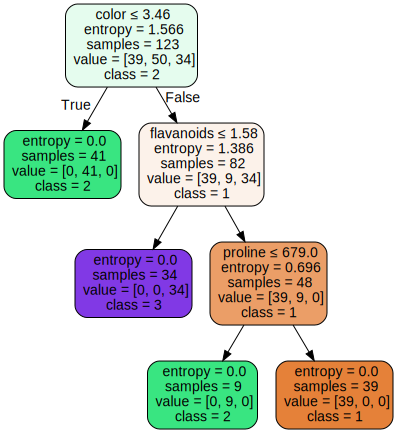

In [5]:
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Accuracy: 0.9259259259259259
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.81      0.89        21
           3       0.82      1.00      0.90        14

    accuracy                           0.93        54
   macro avg       0.92      0.94      0.92        54
weighted avg       0.94      0.93      0.92        54



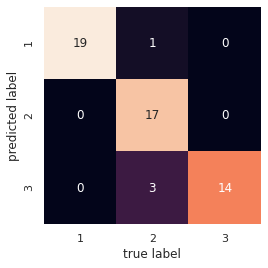

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Vemos un reporte de clasificación de varias métricas
print(metrics.classification_report(y_test, y_pred))

species = np.array(y_test)
predictions = np.array(y_pred)

mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

El arbol generado es bastanten robusto, con un accuracy de 0.926, clasifico mal 4 registros de 54.
Mirando la matriz de confucion estos 4 mal clasificados son de la clase 2, esto explica varias cosas:
- para la clase 1 y la clase 3 el recall del modelo es del 100%, ya que todo los casos que eran de esas clases fueron identificados por el sistema.
- para la clase 1 y 3 la precision no fue del 100%, por que clasificaron registro que eran de clase 2 como su clase, lo cual baja la precision.
- para la clase 2 la precision fue del 100% por que todos los q predijo que eran de esa clase lo eran.
- para la clase 2 el recall fue menor por que no clasifico todo los registros con clase 2. De los 21 registros dijo q 17 eran de esa clase

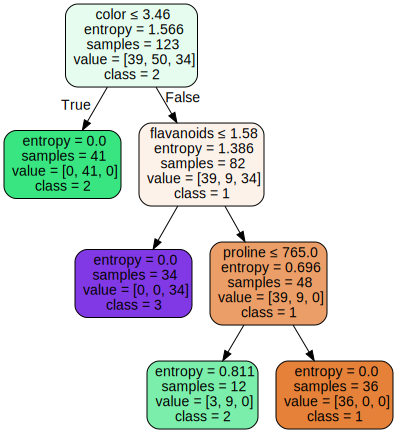

In [7]:
arbol = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=12)
arbol = arbol.fit(X_train,y_train)
y_pred = arbol.predict(X_test)
dot_data = tree.export_graphviz(arbol, out_file=None,
                                feature_names=feature_names,
                                class_names= target_values,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.86      0.92        21
           3       0.82      1.00      0.90        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



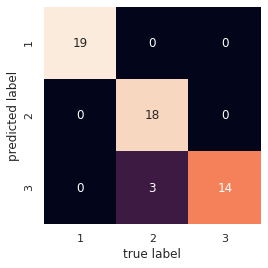

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
species = np.array(y_test)
predictions = np.array(y_pred)
mat = metrics.confusion_matrix(species, predictions)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_values, yticklabels=target_values)

plt.xlabel('true label')
plt.ylabel('predicted label');

Despues de algunas iteracion cambiando parametros del algoritmo encuentro que mejora un poco el resultado al indicar que el tamaño minimo de una hoja del arbol tenga por lo menos 10% de las observaciones, hice este cambio buscando que el modelo no sobreajuste.

